In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [4]:
# Cargar datos
data_path = 'C:/Users/LAURA/Downloads/ANALISIS_DE_DATOS/Tarea_5/Titanic_Dataset.csv'
data = pd.read_csv(data_path)

In [6]:
# 1. Análisis exploratorio de los datos
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("\nDescripción estadística:")
print(data.describe())


Descripción estadística:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
print("\nPrimeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

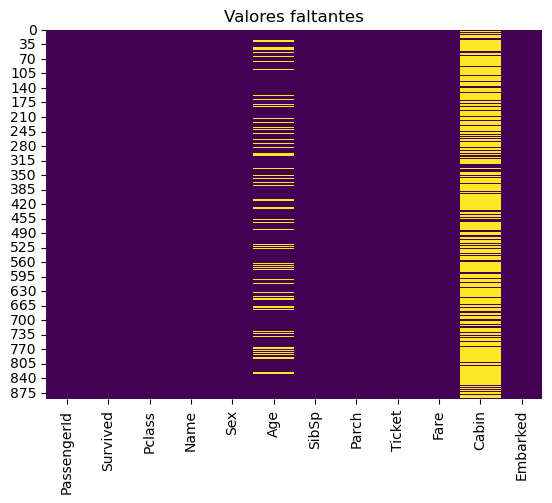

In [12]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes")
plt.show()

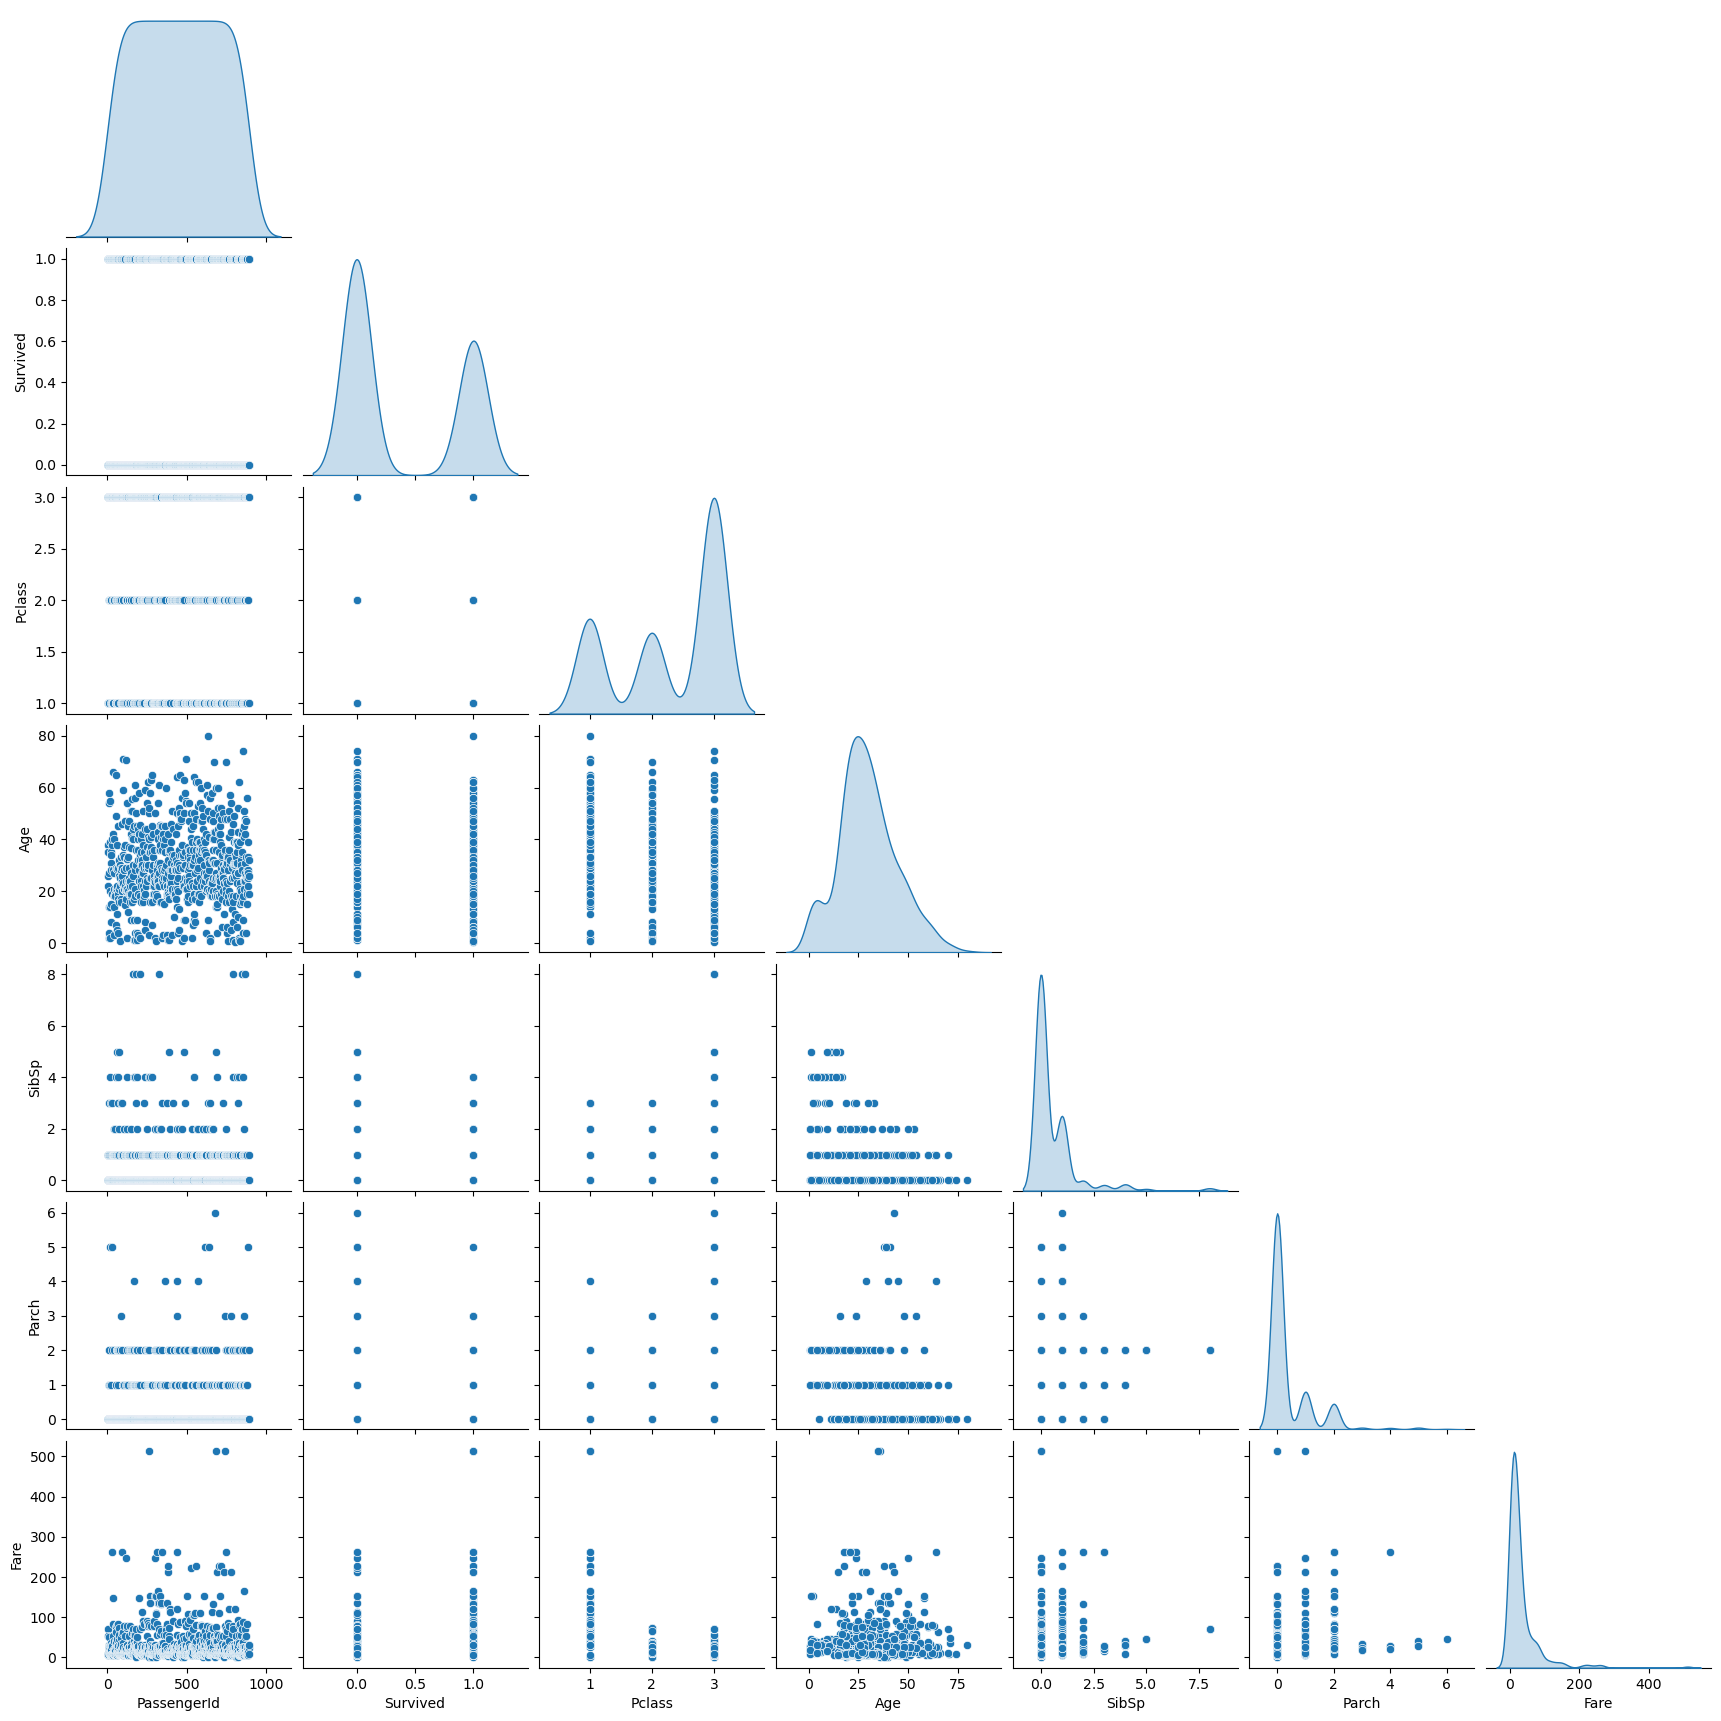

In [14]:
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

In [20]:
# 2. Preprocesamiento de los datos
# Llenar valores faltantes o eliminarlos
data.ffill(inplace=True)

In [22]:
# Codificar variables categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = pd.factorize(data[col])[0]

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

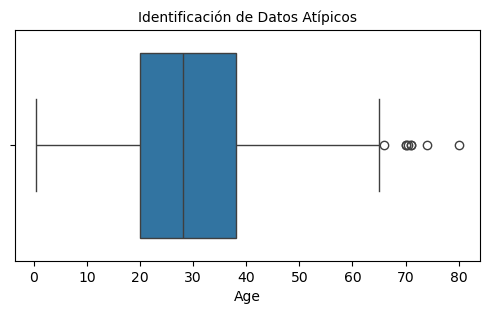

In [56]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

In [60]:
#Conteo de Datos Atípicos

nivel_minimo=80
nivel_maximo=155
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 890


In [64]:
# Filtar Datos Atípicos

data=data[(data['Age']<nivel_maximo)&(data['Age']>nivel_minimo)]

In [66]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [68]:
#Revisión del tipo de datos y datos faltantes

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      int64  
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      int64  
 4   Sex          0 non-null      int64  
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      int64  
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      int64  
 11  Embarked     0 non-null      int64  
dtypes: float64(2), int64(10)
memory usage: 0.0 bytes


In [24]:
# 3. Selección de características
X = data.drop(columns=['Survived'])  # Reemplazar 'Survived' con la columna objetivo real
y = data['Survived']  # Reemplazar con la columna objetivo real

In [50]:
# Total de personas con  Supervivencia

data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [52]:
data[['Survived']].head(892)

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [26]:
# Selección de características usando ANOVA
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:", selected_features)


Características seleccionadas: Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [28]:
# 4. División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [70]:
print (X_train)

[[-1.61413602 -0.45306593 -0.7243102  ... -0.07868358 -0.02574444
  -0.55188019]
 [-0.40055118  1.11387354 -0.7243102  ... -0.37714494  1.18107822
  -0.55188019]
 [ 0.81303367 -0.25427511 -0.7243102  ... -0.47486697  0.15641747
  -0.55188019]
 ...
 [ 0.81303367  1.60890168 -0.7243102  ... -0.35580399  1.77310444
  -0.55188019]
 [-1.61413602 -0.04768856  1.38062393 ...  1.68320121  0.17918771
  -0.55188019]
 [-1.61413602 -1.34567573 -0.7243102  ...  0.86074761 -1.02763496
  -0.55188019]]


In [72]:
print (y_train)

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


In [30]:
# 5. Entrenamiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)

In [36]:
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Matriz de confusión:
[[90 15]
 [20 54]]


In [38]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:", accuracy)


Precisión del modelo: 0.8044692737430168


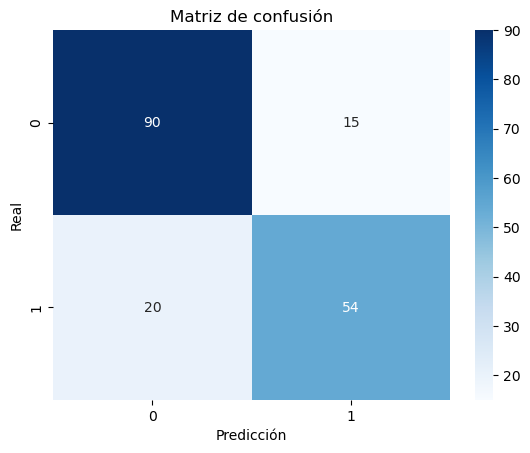

In [42]:
# 7. Gráficas de los resultados
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [74]:
# 8. Interpretar, analizar y documentar los resultados obtenidos.

In [84]:
#*En el Desempeño del Modelo se describe que:

#-Precisión: Esta mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo; 
#en la sobrevivencia del titanic esta precisión es de 0,78, esto significa que el 78% de los predichos con sobrevivencia en el modelo
#sobrevivieron.

#-Recall: Aqui se mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en este conjunto de datos.
#En este recall para la clase de sobrevivencia es 0,73 y esto nos indica que el 73% esta correctamente identificado en el modelo
#de todas las personas sobrevividas.

#-F1 Score: En esta media armonica de precisión y recuperación, nos proporciona una puntuación unica que equilibra la precisión y recall.
#La puntuación F1 Score para la clase de sobrevividos es 0,76, esto nos indica el equilibrio entre precisión y recuerdo.

In [80]:
#*En la Matrix de Confusión :

#El modelo de 90 veces que dijo que una persona no sobrevivio siertamente no habria sobrevivido, por el contrario
#el modelo dijo que 20 veces que una persona no habria sobrevivido pero en realidad si iba a sobrevivir, por lo que acerto 
#90 veces y erro 20; El modelo dijo que 54 veces la persona habria sobrevivido y siertamente 54 veces la persona si sobrevivio; 
#El modelo dijo que 15 veces la persona si habria sobrevivido pero erro porque no sobrevivio.


#•  90 (True Positives, TP): La cantidad de instancias correctamente clasificadas como positivas de no sobrevividos (clase 1 verdadera).
#•  15 (False Positives, FP): Instancias clasificadas incorrectamente como positivas, pero que realmente pertenecen a la clase negativa no sobrevividos (clase 0 verdadera).
#•  20 (False Negatives, FN): Instancias clasificadas incorrectamente como negativas, pero que realmente pertenecen a la clase positiva si sobrevividos (clase 1 verdadera).
#•  54 (True Negatives, TN): Instancias correctamente clasificadas como negativas no sobrevividos (clase 0 verdadera).